Step 1 [30]:​ Read file and display the number of rows
in the data.\
Step 2 [30]:​ Find and display the average number of
surveys conducted per state.\
Step 3 [30]:​ Among the surveys in the data-set,
display the minimum and maximum smoking rate.\
Step 4 [30]:​ Find average smoker rate per state and
display the states with minimum and maximum
average.\
Step 5 [40]:​ Same as Step 4 but display the top 10
states instead of min and max.\
Step 6 [40]: ​Get state and year from user and display
the surveys for that state for that year.\
Step 7 [50]:​ Get state from user as input (using
input()) and display the average smoker rate year by year.\
By looking at the most recent 2 years, display if the cigarette use is on decline or rise.

In [1]:
import numpy as np
import pandas as pd

In [4]:
smk=pd.read_csv('smokers.csv')
smk.head()

,Year,State,Value
0,2015,RI,0.2
1,2015,VT,0.3
2,2017,VA,0.3
3,2017,DE,0.4
4,2015,RI,0.4


In [27]:
smk.shape[0]

3519

In [36]:
smk.groupby('State').Year.nunique().mean()

8.941176470588236

In [23]:
smk.Value.max()

62.3

In [24]:
smk.Value.min()

0.2

In [60]:
smk.groupby('State').Value.mean()

State
AK    17.380392
AL    22.815714
AR    23.433871
AZ    17.867347
CA     5.992857
CO    10.883333
CT    15.445283
DC     6.135897
DE    12.853153
FL    10.482222
GA    12.198684
GU    18.717722
HI    12.697297
IA    19.483333
ID    16.100000
IL    16.787500
IN    18.572222
KS    14.481579
KY    17.031169
LA    19.669697
MA    18.138000
MD     8.934118
ME    13.868992
MI    18.565385
MO    22.193103
MS    20.545455
MT    25.753947
NC    16.260000
ND    16.656250
NE    18.168293
NH    18.076471
NJ    17.467647
NM    12.930682
NV    15.613684
NY    15.556989
OH    24.541463
OK    20.953448
PA    11.385714
PR    10.772727
RI     9.326364
SC    18.084337
SD    30.221154
TN    17.721311
TX    18.114894
US    21.502542
UT    10.710526
VA     6.257407
VT    16.875455
WI    20.590476
WV    20.045882
WY    19.770370
Name: Value, dtype: float64

In [65]:
smk.groupby('State').Value.mean().nlargest(1)

State
SD    30.221154
Name: Value, dtype: float64

In [66]:
smk.groupby('State').Value.mean().nsmallest(1)

State
CA    5.992857
Name: Value, dtype: float64

In [67]:
smk.groupby('State').Value.mean().nlargest(10)

State
SD    30.221154
MT    25.753947
OH    24.541463
AR    23.433871
AL    22.815714
MO    22.193103
US    21.502542
OK    20.953448
WI    20.590476
MS    20.545455
Name: Value, dtype: float64

In [68]:
smk.groupby('State').Value.mean().nsmallest(10)

State
CA     5.992857
DC     6.135897
VA     6.257407
MD     8.934118
RI     9.326364
FL    10.482222
UT    10.710526
PR    10.772727
CO    10.883333
PA    11.385714
Name: Value, dtype: float64

In [113]:
state = input('Enter State:')
year = int(input('Enter Year:'))
smk.query('State==@state & Year == @year')        

Enter State: AK
Enter Year: 2003


,Year,State,Value
1471,2003,AK,12.4
2190,2003,AK,18.4
2278,2003,AK,19.2
2389,2003,AK,20.2
3485,2003,AK,44.2


In [116]:
state = input('Enter State: ')
smk.query('State == @state').groupby('Year').Value.mean()

Enter State:  AK


Year
1995    41.140000
2003    22.880000
2007    20.340000
2009    15.685714
2011    15.800000
2013     9.937500
2015    12.228571
2017    11.300000
Name: Value, dtype: float64

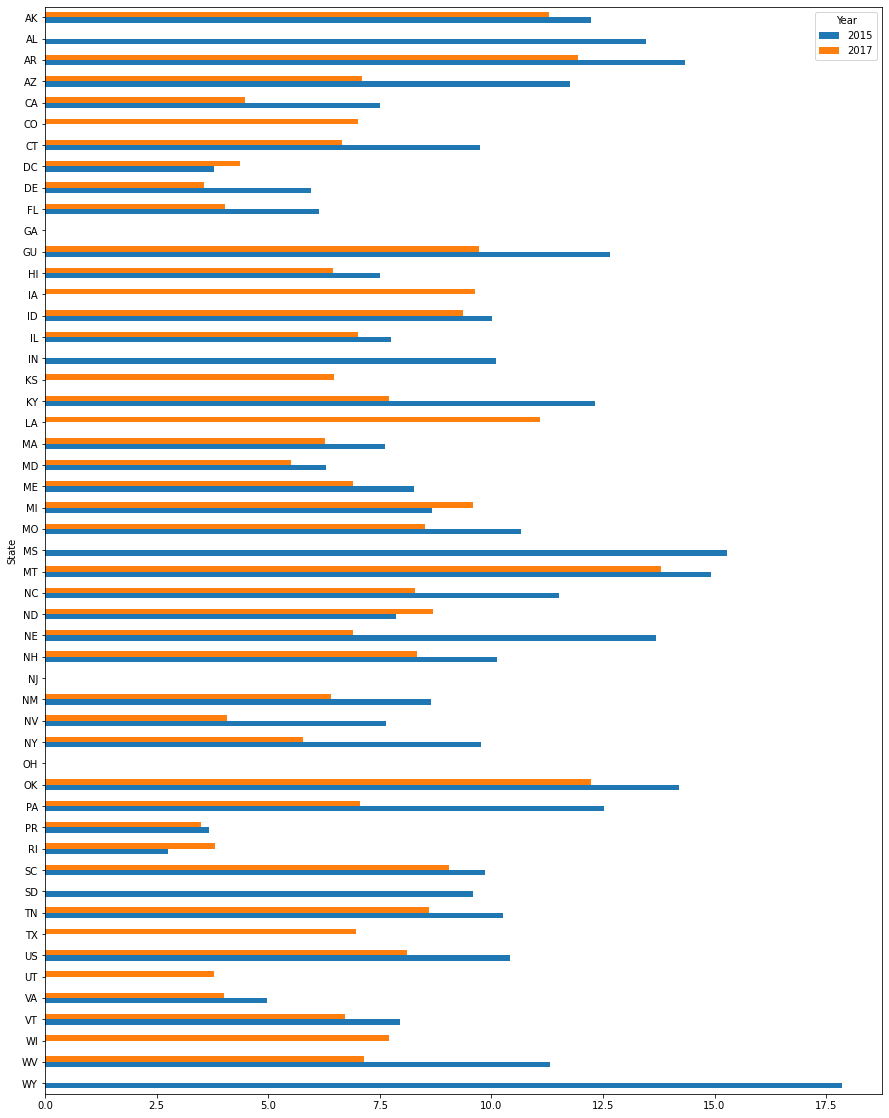

In [221]:
smk.pivot_table(index='State',columns='Year',values='Value',aggfunc='mean').iloc[:,-2:].sort_values(by='State',ascending=False).plot(kind='barh',figsize=(15,20));